Cryptocurrency text mining recommendation engine

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [27]:
link1 = "https://drive.google.com/open?id=1JfwTt0o0ZV-sRDvDjztucGOUCoePz60F"
fluff, id = link1.split('=')
print (id) # Verify that you have everything after '='

1JfwTt0o0ZV-sRDvDjztucGOUCoePz60F


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

import nltk
# Dataset is now stored in a Pandas Dataframe

In [0]:
data_dir = "/content/drive/My Drive/data/reddit-rcryptocurrency/" 
datasets = {"%s%s.csv" % (data_dir, t) for t in ["2017-11", "2017-12", "2018-01", "2018-02", "2018-03"]}
dt_cols = {"author": str,"author_flair_css_class": str, "body": str, "created_utc": str}
df = pd.concat([pd.read_csv(dataset, usecols=dt_cols, dtype=dt_cols) for dataset in datasets], ignore_index=True)

In [30]:
df = df.dropna()
#df = df.drop(df[(df.author_flair_css_class == ("noflair"))].index)
# Delete these row indexes from dataFrame
df.count()

author                    1984373
author_flair_css_class    1984373
body                      1984373
created_utc               1984373
dtype: int64

In [31]:
df.head(n=25)

,author,author_flair_css_class,body,created_utc
0,patientzero_,Warning-level1,what is taxable then in your opinion?,1519862403
1,FreeSpeechWarrior,Training,This post got censored,1519862404
2,heresmyusername,Observer,NEO = gud,1519862405
3,longbreaks,Training,Selling at ATH = His average price is damn nea...,1519862406
4,916hotdogs,noflair,[removed],1519862408
5,havllis,Training,"Offcourse everyone on DarkWeb using Macintosh,...",1519862409
6,Poozy,noflair,Holly shit ICX is killing me,1519862415
7,porkchop487,Dogecoin,The company that partnered with them had Vital...,1519862424
8,vGrizzly,Warning-level1,And this is enough for me to never own any WTC...,1519862425
9,cryptocrazy55,Training,"Also, why do they have themselves in there 18 ...",1519862429


In [32]:
for txt in list(df["body"][:100]):
    print(txt)
    print("-----------------")

what is taxable then in your opinion?
-----------------
This post got censored
-----------------
NEO = gud
-----------------
Selling at ATH = His average price is damn near where LTC is hovering right now.

Shilling the shit out of = questioning trade offs for fast and free transactions, and saying the tech is cool.

Noted. I don't think it's betrayal at all. You'd be stupid think Bill Gates or Steve Jobs never said anything nice about the other, even if it wasn't public.
-----------------
[removed]
-----------------
Offcourse everyone on DarkWeb using Macintosh, Bill said.
-----------------
Holly shit ICX is killing me
-----------------
The company that partnered with them had Vitalik's endorsement so people believed that it meant Vitalik endorsed them himself. Unless you have a source of V saying that Vitalik partnered with them
-----------------
And this is enough for me to never own any WTC ever again, good job!
-----------------
Also, why do they have themselves in there 18 times?

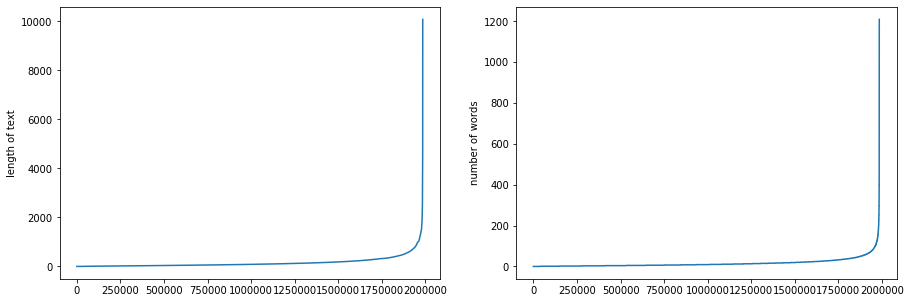

In [33]:
def words_num(txt):
     return len([x for x in txt.split() if 3 < len(x) < 30])

def plot_chars_and_words():
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.plot(list(df["body"].apply(len).sort_values()))
    plt.ylabel("length of text")

    plt.subplot(122)
    plt.plot(list(df["body"].apply(lambda txt: words_num(txt)).sort_values()))
    plt.ylabel("number of words")

    plt.show()

plot_chars_and_words()

In [34]:
conf_min_chars = 150
conf_max_chars = 2000
conf_min_words = 20
conf_max_words = 300

condition = lambda txt: conf_max_chars > len(txt) > conf_min_chars and conf_max_words > words_num(txt) > conf_min_words
df = df[df["body"].map(condition)]
df.count()

author                    449461
author_flair_css_class    449461
body                      449461
created_utc               449461
dtype: int64

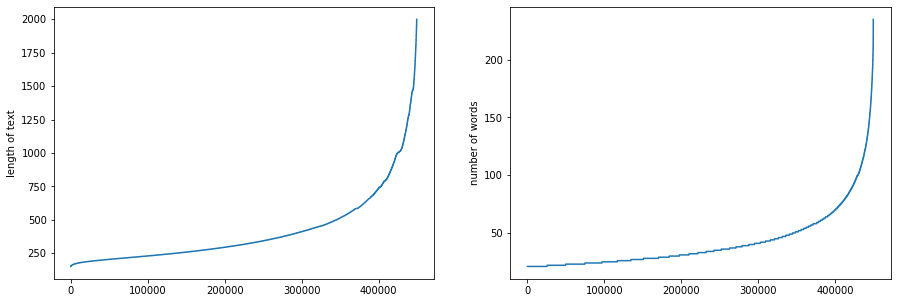

In [35]:
plot_chars_and_words()

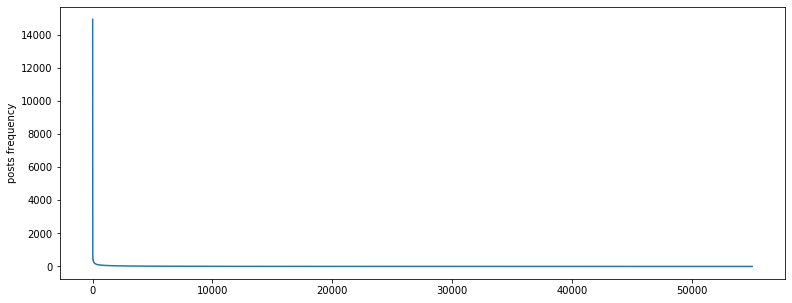

In [36]:
def plot_posts_frequency():
    plt.figure(figsize=(13, 5))
    plt.plot(df["author"].value_counts().to_list())
    plt.ylabel("posts frequency")
    plt.show()

plot_posts_frequency()

In [37]:
conf_min_posts_num = 200
conf_max_posts_num = 1000
df = df[df.groupby("author")["author"].transform("size") > conf_min_posts_num]
df = df[df.groupby("author")["author"].transform("size") < conf_max_posts_num]
"Total authors:", df["author"].nunique()

('Total authors:', 151)

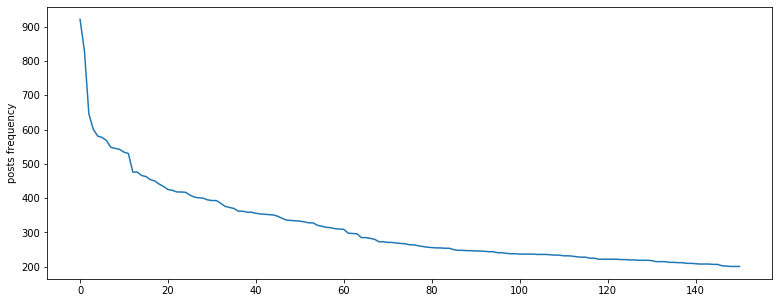

In [38]:
plot_posts_frequency()

In [40]:
import nltk
nltk.download('wordnet')
conf_apply_stemming = True
conf_apply_lemmatizing = True
conf_to_lower_case = True

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lem = nltk.stem.wordnet.WordNetLemmatizer()
stem = nltk.stem.porter.PorterStemmer()

def tokenize(text):
    res = ""
    for w in w_tokenizer.tokenize(text):
        if conf_apply_lemmatizing:
            w = lem.lemmatize(w)
        if conf_apply_stemming:
            w = stem.stem(w)
        if conf_to_lower_case:
            w = w.lower()
        res += w + " "
    return res.strip()

df["optimized_body"] = df["body"].apply(tokenize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [41]:
df.head()

,author,author_flair_css_class,body,created_utc,optimized_body
17,InspectorCollector,Training,Thats what i'm hoping for. It seems a strong p...,1519862448,that what i'm hope for. it seem a strong platf...
22,Suuperdad,noflair,I insta sold. Entire stack. Fuck that shit.\n\...,1519862462,i insta sold. entir stack. fuck that shit. eve...
109,InspectorCollector,Training,Deepest apologies. I thought the added specifi...,1519862847,deepest apologies. i thought the ad specif of ...
138,simmol,noflair,"But in this market, it is not just about funda...",1519862966,"but in thi market, it is not just about fundam..."
155,Gsw-,noflair,Heavy bags? It's already started recovering si...,1519863033,heavi bags? it' alreadi start recov sinc it we...
